* used the 1998 Movie Lens data set from https://grouplens.org/datasets/movielens/100k/
* genres came one hot encoded so only occupation and gender needed to be feature engineered
* utilized random forest to confirm that this model would be a poor predictor when compared to recommender models

In [1]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the ratings file
r_cols = ["user_id", "item_id", "rating", "timestamp"]
ratings = pd.read_csv('../ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# importing the users file 
u_cols = ["user_id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv('../ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# merge users and ratings
df = pd.merge(ratings, users, on="user_id")
df.sort_values("user_id").head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711


In [5]:
df["occupation"].describe()

count      100000
unique         21
top       student
freq        21957
Name: occupation, dtype: object

In [6]:
# importing movies file
i_cols = ["item_id", "movie title", "release date", "video release date", "IMDB URL", "unknown", "action", "adventure", "animation", "children's", "comedy", "crime", "documentary", "drama", "fantasy", "film-noir", "horror", "musical", "mystery", "romance", "sci-fi", "thriller", "war", "western"]
items = pd.read_csv('../ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')
items.head()

,item_id,movie title,release date,video release date,IMDB URL,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# dropping items we don't need for features from the dataframe
items.drop(['IMDB URL', 'release date', 'video release date'],axis=1, inplace=True)
items.head()

,item_id,movie title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# merge df and items
df = pd.merge(df, items, on="item_id")
df.sort_values("user_id").head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
30897,1,161,4,875072303,24,M,technician,85711,Top Gun (1986),0,...,0,0,0,0,0,1,0,0,0,0
30527,1,144,4,875073180,24,M,technician,85711,Die Hard (1988),0,...,0,0,0,0,0,0,0,1,0,0
82356,1,41,2,876892818,24,M,technician,85711,Billy Madison (1995),0,...,0,0,0,0,0,0,0,0,0,0
5247,1,13,5,875071805,24,M,technician,85711,Mighty Aphrodite (1995),0,...,0,0,0,0,0,0,0,0,0,0
24073,1,208,5,878542960,24,M,technician,85711,Young Frankenstein (1974),0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# One Hot Encoding - creates a new column for each gender and occupation and codes with 0 for no and 1 for yes.
gender = pd.get_dummies(df["gender"])
occupation = pd.get_dummies(df["occupation"])

# gender.info()

In [10]:
# merge one hot encoded columns back to original df
df = pd.concat([df,gender,occupation], axis=1)
df.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),0,...,0,0,0,0,0,0,0,0,0,1
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),0,...,0,0,0,1,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),0,...,0,0,0,0,1,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
# use drop to get remaining features
# dropping gender and occupation because we now have the one hot encoded version
data = df.drop(['gender', 'movie title', 'timestamp', 'occupation', 'zip code'],axis=1, inplace=True)
data = df.apply(pd.to_numeric) 
data.head()

,user_id,item_id,rating,age,unknown,action,adventure,animation,children's,comedy,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,3,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,305,242,5,23,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,6,242,4,42,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,63,242,3,31,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [12]:
# exporting data to use in turicreate
datacsv = data.to_csv("../onehot1998data.csv")

In [13]:
target = df["rating"]

In [14]:
# checking for null values
data.isna().sum()

user_id          0
item_id          0
rating           0
age              0
unknown          0
action           0
adventure        0
animation        0
children's       0
comedy           0
crime            0
documentary      0
drama            0
fantasy          0
film-noir        0
horror           0
musical          0
mystery          0
romance          0
sci-fi           0
thriller         0
war              0
western          0
F                0
M                0
administrator    0
artist           0
doctor           0
educator         0
engineer         0
entertainment    0
executive        0
healthcare       0
homemaker        0
lawyer           0
librarian        0
marketing        0
none             0
other            0
programmer       0
retired          0
salesman         0
scientist        0
student          0
technician       0
writer           0
dtype: int64

In [15]:
# dropping the rating column (what we are trying to predict) from the df
data.drop(["rating"],axis=1, inplace=True)

In [16]:
feature_names = data.columns
data.head()

,user_id,item_id,age,unknown,action,adventure,animation,children's,comedy,crime,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,49,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,305,242,23,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,6,242,42,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,60,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,63,242,31,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [18]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.35372

In [19]:
importances = rf.feature_importances_

In [20]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3073243179576332, 'item_id'),
 (0.23188794676997848, 'user_id'),
 (0.179617414401847, 'age'),
 (0.01852336771522678, 'romance'),
 (0.01640129145353013, 'thriller'),
 (0.012690524777558575, 'sci-fi'),
 (0.0125356512251407, 'comedy'),
 (0.012392165640073003, 'action'),
 (0.011104743811716541, 'student'),
 (0.010825454036680972, 'adventure'),
 (0.01078716498044478, 'other'),
 (0.010372119916202426, 'crime'),
 (0.009990196272010518, 'drama'),
 (0.009607877424683095, 'programmer'),
 (0.009037306806804882, 'administrator'),
 (0.008676061586016564, 'engineer'),
 (0.007891264858645563, 'educator'),
 (0.007624510551639088, 'mystery'),
 (0.007325936079887654, 'musical'),
 (0.007273483322327102, 'war'),
 (0.0070431070006818875, 'librarian'),
 (0.006810644539996058, 'writer'),
 (0.006222886930349331, 'horror'),
 (0.006169348161450594, "children's"),
 (0.005923033231628022, 'M'),
 (0.005900061954288792, 'F'),
 (0.0058905738423510245, 'technician'),
 (0.005466612258722278, 'executive'),
 (0.0047

In [21]:
# setting figure size so that all features fit into plot
sns.set(rc={'figure.figsize':(5,10)})

No handles with labels found to put in legend.


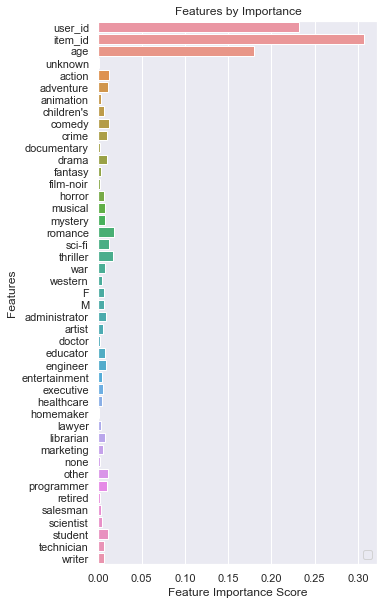

In [22]:
# plotting feature importance
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.savefig("images/RF1998OHE.png")
plt.show()